# PROBLEM STATEMENT

1. Bagaimana jumlah claim setiap tahunnya apakah terjadi peningkatan atau terjadi penurunan?
2. Bandara mana saja yang memiliki laporan claim terbanyak serta yang memiliki total biaya ganti rugi terbesar?
3. Tipe claim dan item apa saja yang paling sering dilaporkan oleh penumpang?
4. Airline mana saja yang paling sering di laporkan oleh penumpang?

# DATA ANALYSIS
setelah melakukan data cleanning kita lanjut menuju data analysis

Import Data Clean

In [156]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import re                           # To perform regex
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # To perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization
import scipy.stats as stats

In [157]:
df_tsa = pd.read_csv('TSA_CLAIM_DATA_CLEAN.csv')
df_tsa.head()

/var/folders/v4/9ddkz_x962v40zk0fwr5mzg40000gn/T/ipykernel_1312/2793531369.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tsa = pd.read_csv('TSA_CLAIM_DATA_CLEAN.csv')


,Unnamed: 0,Claim Number,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
0,0,0909802M,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,2002
1,1,0202417M,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00,Settle,2004
2,2,0202445M,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,2003
3,3,0909816M,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00,Approve in Full,2003
4,4,2005032379513,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby Gear,84.79,Approved,84.79,Approve in Full,2005


## DESCRIPTIVE STATISTICS (STASTISK DESKRIPTIF)

In [158]:
# Airport code kita drop karena ini hanya code dari airport name yang berarti memiliki makna yang sama jadi kita hanya menggunakan airport name saja
df_tsa.drop(columns = ['Airport Name', 'Unnamed: 0'], inplace=True) #Drop the unused column

In [159]:
df_tsa.describe(include='all')

,Claim Number,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Year
count,184367,184367,184367,184367,184367,184367,184367,1.843670e+05,184367,184367.000000,184367,184367.000000
unique,184366,26648,456,309,10,5,29,NaN,12,NaN,7,NaN
top,2004050450432,2004-12-27,LAX,American Airlines,Passenger Property Loss,Checked Baggage,Other,NaN,Denied,NaN,Deny,NaN
freq,2,143,15619,26785,107962,145990,40269,NaN,67914,NaN,89819,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.634846e+07,NaN,71.660142,NaN,2006.777580
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.986844e+09,NaN,794.206961,NaN,3.043926
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,2002.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.300000e+01,NaN,0.000000,NaN,2004.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.099300e+02,NaN,0.000000,NaN,2006.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000e+02,NaN,40.000000,NaN,2009.000000


In [160]:
df_tsa['Item'].unique()

array(['Other', 'Luggage', 'Cell Phones', 'Baby Gear',
       'Professional Equipment', 'Clothing', 'Computers/Laptops',
       'Jewelry', 'Glassess', 'Photography', 'Currency', 'Cosmetics',
       'Electronics', 'Locks', 'Crafting & Hobby', 'Accessories',
       'Sport Equip', 'Medical Equip', 'Automobile Parts', 'Watches',
       'Tools', 'Household Items', 'Beverages', 'Toys',
       'Dolls Unknown Decorator', 'Office Equipment', 'Home Decor',
       'Unknown', 'Home Decor; Home Decor'], dtype=object)

In [161]:
df_tsa['Status'].unique()

array(['Approved', 'Settled', 'Canceled', 'Denied', 'Litigation',
       'Insufficient', 'Closed', 'Processing', 'Deny', '-', 'Settle',
       'Approve in Full'], dtype=object)

### Penjelasan : 

Dapat dilihat bahwa dari analisis deskriptif diatas masih telihat banyak nilai Null disana, tapi tenang saja itu bukanlah suatu masalah karena data dari TSA_Claims ini kebanyakan categorical sedangkan untuk baris mean, std, min, 25%, 50%,75% dan max hanya dapat diisi oleh data numerical

1. Claim Number
    - untuk claim number kita tidak analisis lebih lanjut dikarenakan claim number hanya merupakan angka sebagai unique id untuk setiap report claim yang dibuat
2. Incident Date
    -  Untuk incident date atau dapat dibilang tanggal terjadinya perkara dan dapat dilihat dari table bahwa banyak claim yang terjadi pada tanggal 27 Desember 2004. Ada sebanyak 144 incident date yang ditulis pada tanggal yang sama maka dapat diartikan bahwa pada tanggal 27 Desember 2004 ada 144 perkara yang terjadi dihari tersebut.
    - Selain itu kejadian claim yang dilaporkan terjadi pada 25602 hari yang berbeda 
    - Data TSA Claims ini merupakan kumpulan data atas perkara yang terjadi pada tahun 2002 - 2013, tepatnya kejadian sejak tanggal 1 Januari 2002 hingga 29 Desember 2013
3. Airport Name 
    - Nama Bandara yang memiliki aduan claim terbanyak adalah Los Angeles International Airport, dapat disimpulkan bahwa bandara yang sering bermasalah atau yang paling banyak mendapat claim yaitu bandara Los Angeles International Airport
    - Ada sebanyak 473 airport yang dilaporkan.
4. Airline Name
    - Dari table dapat dilihat bahwa American Airline merupakan nama maskapai yang paling banyak terkena claim dari penumpang. ada sebanyak 26604 laporan claim yang dibuat terhadap maskapain ini
    - Ada sebanyak 309 maskapai yang dilaporkan telah mengalami perkara.
5. Claim Type
    - Dapat dilihat tipe claim yang paling banyak dibuat merupakan Passenger Property Loss yang artinya banyak perkara yang dilaporkan dikarenakan hilangnya barang para penumpang. Property loss sendiri muncul sebanyak 107962 atau lebih dari 50% atau sebagian besar dari 184366 claim yang dibuat merupakan perkara terkait hilangnya barang.
    - ada 11 tipe perkara yang dilaporkan
6. Claim Site
    - Lokasi ketika pelapor mengajukan claim paling banyak dilakukan saat melakukan cek bagasi. Ada 145989 laporan yang dibuat ketika saat penumpang melakukan cek bagasi. 
    - ada 7 lokasi pengajuan claim yang berbeda antar tiap pelapornya. 
7. Item 
    - Item atau barang yang paling banyak di claim adalah kategori other, dapat kita asumsikan bahwa kategori 'Other' merupakan item selain dari 27 jenis item lainnya atau selain dari 'Luggage', 'Cell Phones', 'Baby Gear', 'Professional Equipment', 'Clothing', 'Computers/Laptops','Jewelry','Glassess', 'Photography', 'Currency', 'Unknown','Cosmetics', 'Electronics', 'Locks', 'Crafting & Hobby','Accessories', 'Sport Equip', 'Medical Equip', 'Automobile Parts','Watches', 'Tools', 'Household Items', 'Beverages', 'Toys','Dolls Unknown Decorator', 'Office Equipment', 'Home Decor'. 
    - Dapat dilihat bahwa ada 36505	claim yang dibuat atas item ini

8. Claim Amount
    - Untuk rata-rata Jumlah Nominal biaya ganti rugi yang diminta oleh para penumpang sebesar $16,348,550.00 untuk periode claim dari 2002-2013
    - Untuk nominal paling kecil yang dilaporkan Ada pelapor yang meminta biaya ganti rugi atau sebesar $0, dan sedangkan ada juga yang melapor biaya ganti rugi paling besar sebesar $3,000,000,000,000.00

9. Status 
    - Banyak status yang di tolak (denied) ketika laporan klaim diterima oleh TSA. Ada sebanyak 67914 laporan yang ditolak oleh TSA
    - Status pun dibagi menjadi 12 kategori

10. Close Amount
    - Jumlah rata-rata ganti rugi yang telah dikeluarkan TSA kepada pelapor sebesar $71.660531
    - Untuk nominal paling besar yang pernah dikeluarkan TSA untuk ganti rugi adalah sebesar $250000

11. Disposition
    - Kebanyakan Status akhir dari perkara yang telah dilaporkan adalah Deny atau ditolak. Ada sebanyak 89819 laporan claim yang ditolak dan ada 7 kategori status akhir.

12. Year
    - Pelaporan claim paling banyak terjadi di tahun 2004 dengan total kasus sebanyak 28960.

### Data Overview
- Total ada 184366 baris data dari hasil cleanning
- Ada beberapa column yang di drop seperti Date Received dan Airport Name dikarenakan kita tidak membutuhkan data tersebut
- Dibuat column baru bernama Year, agar mempermudah dalam menganalisis claim yang terjadi pertahunnya

## BIVARIATE ANALYSIS

### 1. Claim Per Tahun

In [162]:
# membuat pivot table untuk menghitung jumlah claim berdasarkan tahun
claim_count = df_tsa.pivot_table(index='Year', values= 'Claim Number', aggfunc='count')

# menampilkan hasil
print(claim_count)

      Claim Number
Year              
2002          2156
2003         24508
2004         28960
2005         22965
2006         18806
2007         18270
2008         15902
2009         11179
2010         12214
2011         10992
2012          9939
2013          8476


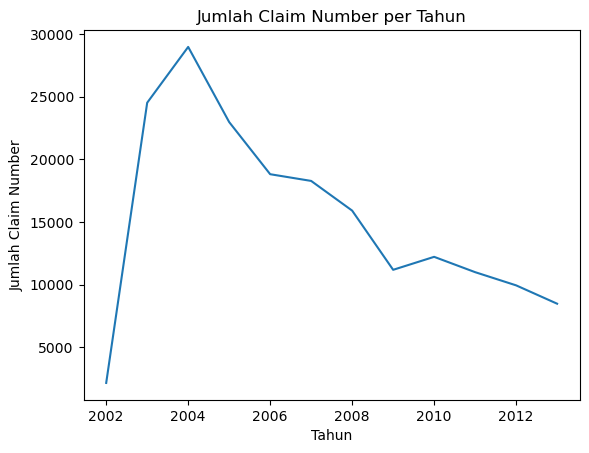

In [163]:
# Menghitung jumlah claim number per tahunnya
claim_per_year = df_tsa.groupby("Year")["Claim Number"].count()

# Membuat line plot
plt.plot(claim_per_year.index, claim_per_year.values)

# Menambahkan judul dan label sumbu
plt.title("Jumlah Claim Number per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Claim Number")

# Menampilkan plot
plt.show()

Dari table diatas dapat terlihat bahwa puncak dari grafik garis diatas berada ditahun 2004, ini berarti bahwa pada tahun 2004 terjadi banyaknya pengaduan claim kepada TSA. Namun beruntungnya ditahun-tahun berikutnya jumlah claim menurun. Maka ini dapat dikatakan bahwa kinerja dari Petugas TSA sudah membaik sehingga dapat mengurangi jumlah claim. Walaupun pada tahun 2010 terjadi peningkatan pengaduan claim sedikit, tapi untngnya ditahun berikutnya jumlah claim dapat menurun

In [185]:
# Menghitung rata-rata claim amount tiap tahun
avg_claim_amount = df_tsa.groupby('Year')['Claim Amount'].mean()

# Menampilkan hasil
print(avg_claim_amount.to_string(float_format='%.2f'))

Year
2002     2329413.77
2003        4182.11
2004      261419.47
2005        7237.33
2006        7047.42
2007   164261724.27
2008        2399.58
2009        1835.32
2010          57.43
2011          81.35
2012          77.92
2013          52.09


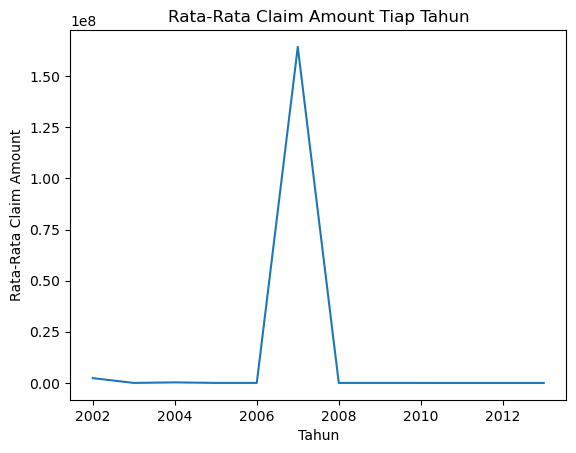

In [188]:
# Menghitung rata-rata claim amount tiap tahun
avg_claim_amount = df_tsa.groupby('Year')['Claim Amount'].mean()

# Membuat bar plot
plt.plot(avg_claim_amount.index, avg_claim_amount.values)
plt.title('Rata-Rata Claim Amount Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Claim Amount')
plt.show()

Grafik tersebut menunjukkan rata-rata jumlah klaim yang diajukan untuk setiap tahun pada rentang waktu yang diberikan. Dapat dilihat bahwa rata-rata klaim tertinggi terjadi pada tahun 2007, dengan rata-rata sekitar 164,2 juta dolar, kemudian menurun secara signifikan pada tahun 2010 dan 2013, dengan rata-rata di bawah 100 dolar. Walaupun tidak semua nilai claim yang diajukan oleh para penumpang akan di proses tapi dari grafik ini TSA dapat membuat sebuah peraturan yang dapat mengukur nilai claim agar lebih masuk akal dan teratur.

Hal ini dapat membantu dalam membuat kebijakan yang lebih efektif dalam menangani pengajuan klaim oleh para penumpang dan memperbaiki pengalaman mereka dalam bepergian.


### 2. TOP 10 Bandara dengan Claim terbanyak 

In [164]:
# membuat pivot table untuk menghitung jumlah claim berdasarkan tahun
top_airports = df_tsa.pivot_table(index='Airport Code', values= 'Claim Number', aggfunc='count')
print (top_airports)


              Claim Number
Airport Code              
-                      318
ABE                    120
ABI                     37
ABQ                    880
ABR                     27
...                    ...
YKM                     40
YNG                     11
YUM                     18
ZZX                    209
ZZZ                     10

[456 rows x 1 columns]


In [165]:
# # sort berdasarkan jumlah klaim terbanyak
top_airports = top_airports.sort_values(by='Claim Number', ascending=False).head(10)
print(top_airports)

              Claim Number
Airport Code              
LAX                  15619
JFK                   8032
ORD                   6301
EWR                   6184
MIA                   5755
MCO                   5646
ATL                   5183
SEA                   4917
PHX                   4591
LAS                   4558


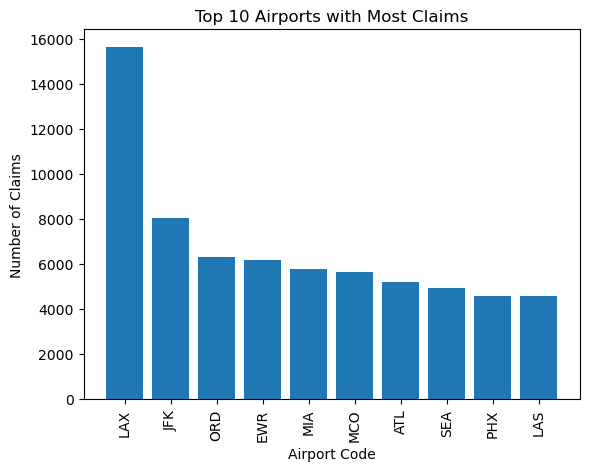

In [166]:
# hitung jumlah klaim untuk setiap bandara
claim_count = df_tsa.groupby('Airport Code')['Claim Number'].count().reset_index(name='Count')

# sort berdasarkan jumlah klaim terbanyak
top_airports = claim_count.sort_values(by='Count', ascending=False).head(10)

# plot bar chart
plt.bar(top_airports['Airport Code'], top_airports['Count'])
plt.xticks(rotation=90)
plt.title('Top 10 Airports with Most Claims')
plt.xlabel('Airport Code')
plt.ylabel('Number of Claims')
plt.show()

Hasil dari grafik ini menunjukan 10 bandara yang dilaporkan terbanyak ada LAX (Los Angeles International Airport), JFK (John F. Kennedy International), ORD (Chicago O'Hare International Airport), EWR (Newark International Airport), MIA (Miami International Airport), MCO (Orlando International Airport), ATL (Hartsfield-Jackson Atlanta International Airport), SEA (Seattle-Tacoma International), PHX (Phoenix Sky Harbor International Airport) dan LAS (McCarran International Airport). 


Dengan melihat barplot ini, dapat diketahui bahwa seluruh bandara ini adalah bandara International dan 7 diantaranya (kecuali SEA, PHX, LAS) termasuk kedalam bandara tersibuk di dunia (wikipedia). Hal ini mungkin disebabkan oleh volume penumpang yang lebih besar atau frekuensi penerbangan yang lebih tinggi di bandara-bandara ini. 

Informasi ini dapat membantu TSA untuk lebih memperhatikan area-area yang rawan terhadap kerugian pada properti penumpang dan memperbaiki sistem atau prosedur mereka untuk mengurangi risiko tersebut. Selain itu TSA juga dapat memberikan pelatihan lebih atau menambah pegawai agar dapat melakukan pemeriksaan dengan aman tanpa merusak barang penumpang atau melukai penumpang

TSA juga dapat fokus dulu untuk memperbaiki kinerja pegawai yang beroperasi di 10 bandara ini, agar dapat lebih fokus dan optimal. Apalagi 10 bandara ini merupakan bandara International yang dimana banyak pengunjung dari wisatawan luar. 



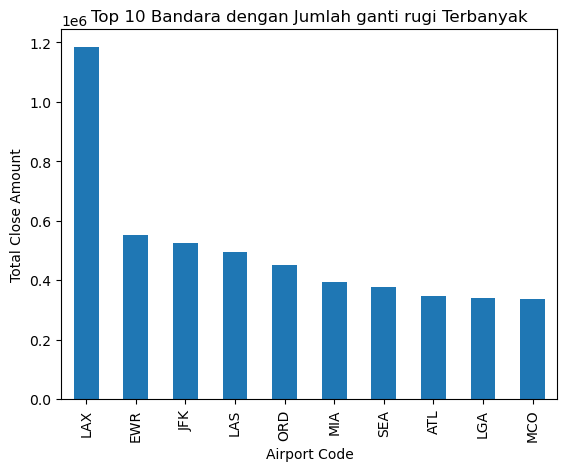

In [167]:
# Mengelompokkan data berdasarkan Airline Name dan menghitung total Close Amount
airport_close_amount = df_tsa.groupby('Airport Code')['Close Amount'].sum()

# Mengurutkan hasil dari yang terbesar ke yang terkecil dan memilih 10 yang teratas
top_10_airport_close_amount = airport_close_amount.sort_values(ascending=False)[:10]

# Menampilkan hasil dalam bentuk bar plot
top_10_airport_close_amount.plot(kind='bar')
plt.title('Top 10 Bandara dengan Jumlah ganti rugi Terbanyak')
plt.xlabel('Airport Code')
plt.ylabel('Total Close Amount')
plt.show()

In [168]:
# Menghitung jumlah total close amount untuk LAX
LAX = df_tsa[df_tsa['Airport Code'] == 'LAX']
total_close_amount1 = LAX['Close Amount'].sum()

# Menghitung jumlah total close amount untuk EWR
EWR = df_tsa[df_tsa['Airport Code'] == 'EWR']
total_close_amount2 = EWR['Close Amount'].sum()

## Menghitung jumlah total close amount untuk JFK
JFK = df_tsa[df_tsa['Airport Code'] == 'JFK']
total_close_amount3 = JFK['Close Amount'].sum()

# Menampilkan hasil
print('Jumlah total ganti rugi yang harus dibayarkan oleh TSA LAX sebesar', total_close_amount1)
print('Jumlah total ganti rugi yang harus dibayarkan oleh TSA EWR sebesar', total_close_amount2)
print('Jumlah total ganti rugi yang harus dibayarkan oleh TSA JFK sebesar', total_close_amount3)

Jumlah total ganti rugi yang harus dibayarkan oleh TSA LAX sebesar 1183764.4900000002
Jumlah total ganti rugi yang harus dibayarkan oleh TSA EWR sebesar 550761.7
Jumlah total ganti rugi yang harus dibayarkan oleh TSA JFK sebesar 525770.11


Grafik yang bawah berbeda dengan grafik sebelumnya. Ini merupakan urutan 10 Bandara dengan jumlah ganti rugi terbesar. Grafik ini menunjukan urutan yang berbeda dengan grafik yang berwarna biru. Dengan grafik ini kita dapat mengetahui bahwa bandara dengan jumlah claim terbanyak tidak menjamin bahwa mereka memiliki jumlah total ganti rugi yang besar. Bandara dengan code LGA sebelumnya tidak masuk kedalam 10 bandara dengan total claim terbanyak tapi nyatanya LGA masuk kedalam 10 daftar bandara dengan total ganti rugi terbesar. 

Urutan pertama bandara dengan total ganti rugi terbesar adalah LAX dengan total ganti rugi atas claim yang terjadi di tahun 2002 - 2013 sebesar $1183619.04. Di urutan kedua ada badara EWR dengan total ganti rugi sebanyak $550761.7, namun jika kita melihat di grafik bandara dengan jumlah claim terbanyak bandara EWR ada diposisi ke-4. Diurutan ketiga ada bandara JFK dengan total ganti rugi sebanyak $525915.56 padahal JFK sebelumnya berada di urutan kedua dengan jumlah claim terbanyak. 



### 3. Airline Name, Claim Number

In [169]:
# membuat pivot table untuk menghitung jumlah claim berdasarkan tahun
top_airlines = df_tsa.pivot_table(index='Airline Name', values= 'Claim Number', aggfunc='count')
print (top_airlines)

                        Claim Number
Airline Name                        
-                               3305
ATA Aerocondor                   327
Aer Lingus                        92
Aero California                    3
Aero Costa Rica                    1
...                              ...
Westjet Airlines Ltd             152
Wiggins Airways                    1
XL Airways                         2
Xtra Airways                      17
vivaAerobus                        1

[309 rows x 1 columns]


In [170]:
# # sort berdasarkan jumlah klaim terbanyak
top_airlines = top_airlines.sort_values(by='Claim Number', ascending=False).head(10)
print(top_airlines)

                      Claim Number
Airline Name                      
American Airlines            26785
Delta Air Lines              18715
Southwest Airlines           18636
UAL                          15891
Continental Airlines         11089
Northwest Airlines           10768
USAir                        10435
Jet Blue                      8027
Delta Air Lines               7062
Alaska Airlines               5966


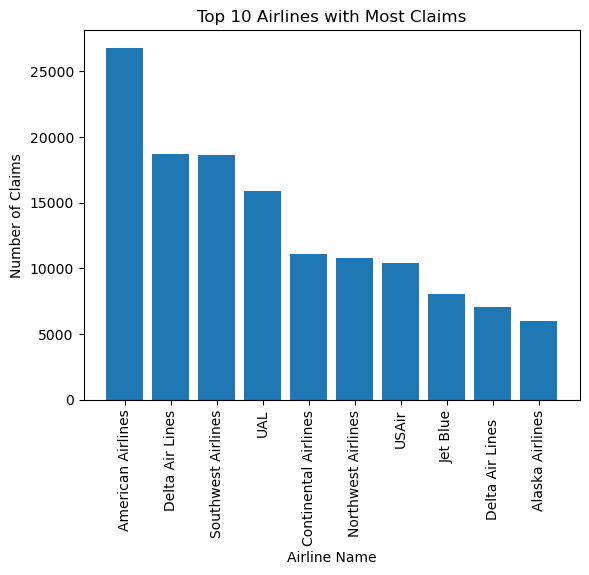

In [171]:

# hitung jumlah klaim untuk setiap bandara
claim_count = df_tsa.groupby('Airline Name')['Claim Number'].count().reset_index(name='Count')

# sort berdasarkan jumlah klaim terbanyak
top_airlines = claim_count.sort_values(by='Count', ascending=False).head(10)


# plot bar chart
plt.bar(top_airlines['Airline Name'], top_airlines['Count'])
plt.xticks(rotation=90)
plt.title('Top 10 Airlines with Most Claims')
plt.xlabel('Airline Name')
plt.ylabel('Number of Claims')
plt.show()

Grafik diatas menampilkan 10 maskapai penerbangan yang paling banyak mendapatkan claim. American Airlines menempati posisi nomor 1.
Dari barplot tersebut, maskapai dapat memanfaatkan informasi ini untuk menjadi bahan evaluasi dan perbaikan layanan di masa yang akan datang. Airline dapat mengatur pegawainya untuk memantau kinerja pegawai TSA supaya memastikan bahwa barang-barang dari para penumpang aman. Selain itu, informasi ini juga dapat membantu calon penumpang dalam memilih airline yang memiliki kualitas layanan yang lebih baik dan minim keluhan dari pelanggan. 


In [172]:
# Menghitung jumlah total close amount untuk American Airlines
american_airlines = df_tsa[df_tsa['Airline Name'] == 'American Airlines']
total_close_amount1 = american_airlines['Close Amount'].sum()

# Menghitung jumlah total close amount untuk Southwest Airlines
Southwest_Airlines = df_tsa[df_tsa['Airline Name'] == 'Southwest Airlines']
total_close_amount2 = Southwest_Airlines['Close Amount'].sum()

## Menghitung jumlah total close amount untuk Delta Airlines
Delta_Airlines = df_tsa[df_tsa['Airline Name'] == 'Delta Air Lines']
total_close_amount3 = Delta_Airlines ['Close Amount'].sum()

# Menampilkan hasil
print('Jumlah total close amount pada American Airlines adalah', total_close_amount1)
print('Jumlah total close amount pada Southwest Airlines adalah', total_close_amount2)
print('Jumlah total close amount pada Delta Airlines adalah', total_close_amount3)

Jumlah total close amount pada American Airlines adalah 2425834.3800000004
Jumlah total close amount pada Southwest Airlines adalah 2036795.96
Jumlah total close amount pada Delta Airlines adalah 1559194.4400000002


Barplot diatas berbeda dengan barplot sebelumnya dimana untuk barplot yang ini (yang berwarna pink) menampilkan top 10 airline dengan jumlah ganti rugi terbesar yang harus TSA gantikan kepada pelapor. 

## 4. CLAIM TYPE 

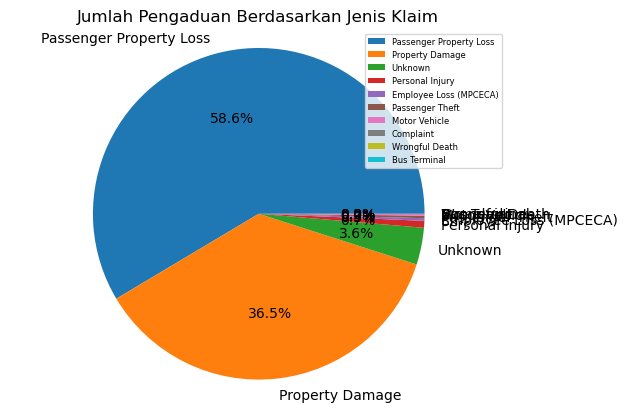

In [173]:
# Hitung jumlah pengaduan berdasarkan jenis klaim
claim_type_counts = df_tsa['Claim Type'].value_counts()

# Buat pie chart
plt.pie(claim_type_counts, labels=claim_type_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Jumlah Pengaduan Berdasarkan Jenis Klaim')
plt.legend()
plt.legend(loc='best', fontsize=6)
plt.show()

Pie chart diatas menampilkan proporsi jenis klaim yang dibuat oleh pelapor. Berdasarkan pie chart tersebut, jenis klaim terbanyak adalah hialngnya barang penumpang atau Passenger Property Loss dengan proporsi sebesar 58.6%, diikuti oleh rusaknya property/ Property Damage dengan proporsi sebesar 36.5%. 

- Rekomendasi : 
    - Meningkatkan kualitas dan keamanan dalam pengangkutan barang dan property penumpang agar mengurangi angka hilang atau rusaknya property penumpang.
    - Memperbaiki dan meningkatkan sistem manajemen barang dan property penumpang, seperti pemeriksaan sebelum keberangkatan dan pengamanan yang lebih baik selama penerbangan.
    - Menyediakan layanan klaim yang lebih mudah dan cepat untuk pelapor yang mengalami hilang atau rusaknya property/ barang penumpang agar dapat langsung di lacak/diperiksa.
    - Memberikan edukasi yang lebih baik kepada pelanggan mengenai cara menyimpan dan merawat property/ barang penumpang agar dapat mengurangi kemungkinan terjadinya kerusakan atau hilang.

## 5. Item yang sering terkena claim

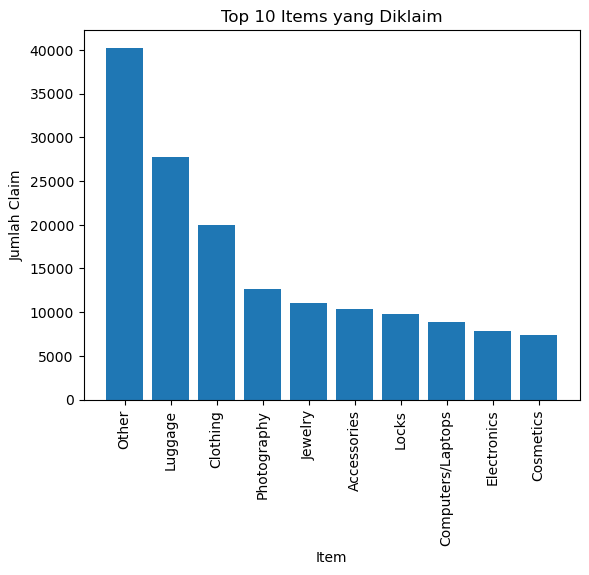

In [174]:
# Hitung jumlah pengaduan berdasarkan item
item_counts = df_tsa['Item'].value_counts()

# Ambil 10 item teratas
top_items = item_counts.head(10)

# Buat bar plot
plt.bar(top_items.index, top_items.values)
plt.title('Top 10 Items yang Diklaim')
plt.xlabel('Item')
plt.ylabel('Jumlah Claim')
plt.xticks(rotation=90)
plt.show()

In [175]:
df_airport = df_tsa.groupby('Airport Code').size().nlargest(10)
df_airline = df_tsa.groupby('Airline Name').size().nlargest(10)
df_claim_airport = df_tsa[df_tsa['Airport Code'].isin(df_airport.index)]
df_claim_airline = df_tsa[df_tsa['Airline Name'].isin(df_airline.index)]
df_claim_airport_airline = df_claim_airport.groupby(['Airport Code', 'Airline Name', 'Claim Type']).size().unstack(fill_value=0).stack()
df_combined = pd.concat([df_airport.to_frame().assign(Category='Airport Code'), df_airline.to_frame().assign(Category='Airline Name')]).reset_index().rename(columns={0: 'Count'})
df_pivot = pd.pivot_table(df_claim_airport_airline.reset_index(), values=0, index=['Airport Code', 'Airline Name'], columns=['Claim Type'], aggfunc=np.sum, fill_value=0)



Berdasarkan hasil grafik tersebut, petugas bandara dapat melihat item-item yang paling sering di-claim oleh penumpang dan besarnya jumlah klaim yang terkait dengan item tersebut. Dengan informasi ini, petugas bandara dapat meningkatkan pengawasan terhadap item-item tersebut untuk memastikan bahwa mereka dalam kondisi yang baik dan tidak menyebabkan kerusakan atau kehilangan bagi penumpang.

Selain itu, petugas bandara juga dapat mempertimbangkan untuk memperkuat peraturan dan kebijakan terkait item-item tersebut. Misalnya, mengatur batasan berat dan ukuran barang bawaan penumpang agar tidak merusak atau merugikan penumpang lain, atau menambahkan perlindungan asuransi bagi barang berharga yang dibawa oleh penumpang.

Rekomendasi lainnya adalah memperkuat pelatihan dan pendidikan untuk petugas bandara dalam menangani klaim penumpang. Petugas harus dilatih untuk dapat memberikan pelayanan yang baik dan responsif kepada penumpang yang mengalami kerusakan atau kehilangan barang bawaan mereka, sehingga dapat memperbaiki citra bandara dan memberikan pengalaman yang lebih baik bagi penumpang.

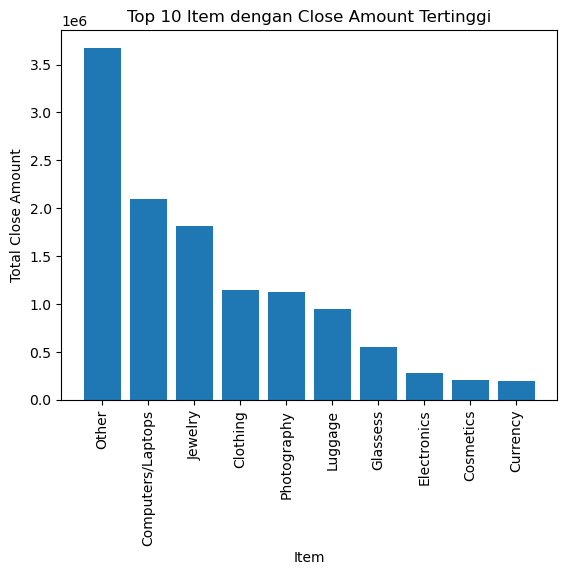

In [176]:
# Menghitung total close amount berdasarkan item
item_close_amount = df_tsa.groupby('Item')['Close Amount'].sum()

# Mengurutkan item berdasarkan total close amount
sorted_items = item_close_amount.sort_values(ascending=False)

# Ambil 10 item teratas
top_items = sorted_items.head(10)

# Buat bar plot
plt.bar(top_items.index, top_items.values)
plt.title('Top 10 Item dengan Close Amount Tertinggi')
plt.xlabel('Item')
plt.ylabel('Total Close Amount')
plt.xticks(rotation=90)
plt.show()


Barplot diatas merupakan barplot yang menampilkan urutan 10 besar dari jumlah ganti rugi yang selama ini digantikan oleh TSA terhadap barang yang terkena claim. Dapat dilihat urutan tersebut berbeda dengan barplot sebelumnya. 
Rekomendasi yang dapat diberikan adalah untuk meningkatkan pengawasan dan keamanan di area penanganan bagasi, khususnya untuk item-item yang sering mengalami kerusakan atau hilang seperti bagasi dan barang berharga seperti perhiasan. Selain itu, pihak bandara dapat memberikan edukasi dan sosialisasi kepada penumpang mengenai cara pengemasan yang baik dan tata cara penanganan barang bawaan agar dapat mengurangi risiko kerusakan atau kehilangan barang. Seperti laptops/computer dan jewelry lebih baik dibawa kedalam cabin pesawat daripada di dalam koper karna koper ditaruh di dalam bagasi dan kita tidak tahu apakah koper tersebut/tertindih dengan koper lain sehingga membuat laptop menjadi rusak. 

## 6. CLAIM SITE

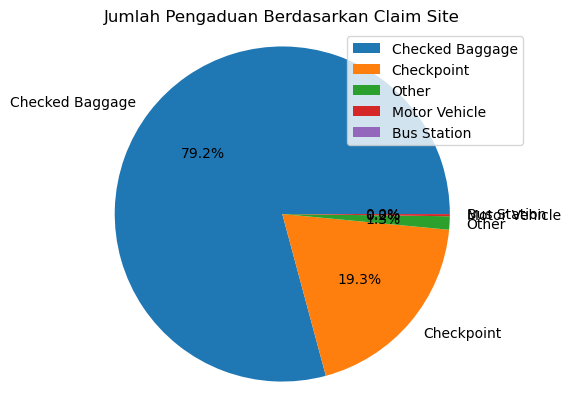

In [177]:
# Hitung jumlah pengaduan berdasarkan claim site
claimsite_counts = df_tsa['Claim Site'].value_counts()

# Buat pie chart
plt.pie(claimsite_counts, labels=claimsite_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Jumlah Pengaduan Berdasarkan Claim Site')
plt.legend()
plt.show()

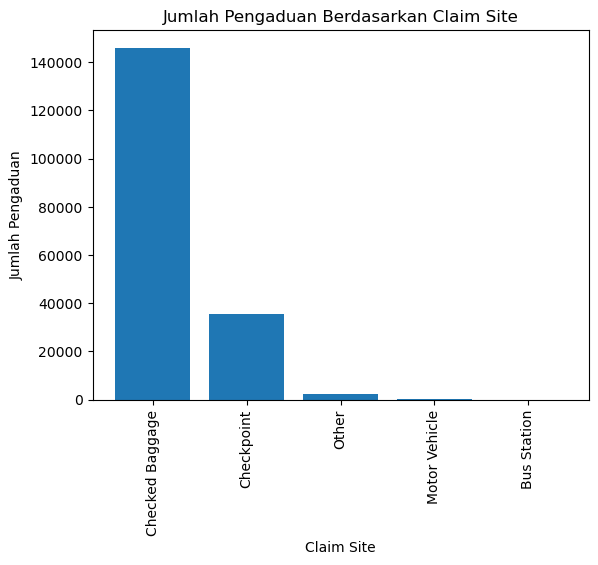

In [178]:
# Hitung jumlah pengaduan berdasarkan claim site
claim_site_counts = df_tsa['Claim Site'].value_counts()

# Buat bar plot
plt.bar(claim_site_counts.index, claim_site_counts.values)
plt.title('Jumlah Pengaduan Berdasarkan Claim Site')
plt.xlabel('Claim Site')
plt.ylabel('Jumlah Pengaduan')
plt.xticks(rotation=90)
plt.show()

Agar lebih jelas kita membuat dalam bentuk barplot. Dari hasil code tersebut, dapat dilihat bahwa claim site dengan jumlah pengaduan terbanyak adalah 'Checked Baggage' dan 'Check Point'. Rekomendasi yang dapat diberikan adalah pihak bandara dapat memperhatikan lebih serius terhadap penanganan bagasi agar dapat mengurangi jumlah pengaduan terkait checked baggage. Selain itu, dapat dilakukan evaluasi terhadap prosedur penanganan pengaduan pada claim site yang sering muncul, sehingga penanganan dapat dilakukan dengan lebih efektif dan efisien.

# **KESIMPULAN**

Dari tahun 2002 hingga 2013 Ada total 184367 claim yang dilaporkan dan oleh penumpang terhadap TSA. Laporan dibuat untuk 456 bandara yang berbeda. Tahun dengan laporan claim terbanyak ada pada tahun 2004 namun setelah tahun 2004 laporan Claim yang diajukan oleh penumpang menurun setiap tahunya. Namun jika melihat raa-rata jumlah claim yang diajukan kepada TSA tahun dengan rata-rata jumlah claim tertinggi ada di tahun 2007. 
10 Bandara yang mendapat laporan claim terbanyak seluruhnya merupakan bandara International. 7 dari 10 bandara (kecuali SEA, PHX LAS) merupakan termasuk kedalam 20 bandara tersibuk di amerika serikat (source : wikipedia). Bandara Los angeles merupakan bandara dengan laporan clai terbanyak serta bandara yang harus mengganti ganti rugi dengan jumlah paling besar. TIpe claim yang paling sering dilaorkan adalah Passenger Property Loss dengan proporsi sebesar 58.6%, diikuti oleh rusaknya property/ Property Damage dengan proporsi sebesar 36.5%. Koper menjadi barang yang paling sering mengalami claim dan Computer menjadi item yang paling tinggi jumlah nilai ganti ruginya. Kebanyakan dari penumpang membuat laporan claim saat sedang melakukan cek bagasi dan pada saat check point. 

# Saran
Dapat dilihat bahwa laporan claim tiap tahunnya menurun, artinya TSA dapat mempertahankan kinerja mereka dan meningkatkan kinerja mereka agar laporan claim terus menurun. Ada beberapa saran yang dapat diberikan melalui hasil analisis diatas.
- TSA dapat membuat peraturan atau kebijakan yang mengatur jumlah nilai claim yang dapat diajukan bisa berdasarkan kategori item.
- TSA dapat meningkatkan pelayanan dan melakukan evaluasi  terhadap prosedur penanganan barang dan bagasi penumpang untuk mengurangi jumlah klaim yang masuk dari bandara tersebut. TSA dapat fokus dahulu khususnya pada bandara-bandara yang paling sibuk.
- Untuk maskapai penerbangan dapat memberikan bantuan kepada petugas bandara selain itu untuk memantau petugas bandara dalam menangani bagasi dan barang para penumpangnya agar tidak terjadi hal yang tidak diinginkan. 
- TSA dan maskapai bekerja sama dalam Memperbaiki dan meningkatkan sistem manajemen barang dan property penumpang, seperti pemeriksaan sebelum keberangkatan dan pengamanan yang lebih baik selama penerbangan.
- Menyediakan layanan klaim yang lebih mudah dan cepat untuk pelapor yang mengalami hilang atau rusaknya property/ barang penumpang agar dapat langsung di lacak/diperiksa.
- Memberikan edukasi yang lebih baik kepada pelanggan mengenai cara menyimpan dan merawat property/ barang penumpang agar dapat mengurangi kemungkinan terjadinya kerusakan atau hilang.